In [1]:
import numpy as np
from numpy.linalg import eig
import scipy.sparse.linalg

data = open('pageRank-gr0.California.txt', 'r')

a = True
edge_list = np.empty((16150, 2), dtype=int)
i = 0
M=np.zeros((9664,9664), dtype=float) 

while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] == 'e':
        t = data_line.split()
        edge_list[i][0] = t[1]
        edge_list[i][1] = t[2]
        i = i + 1


# Creating link matrix, binary
for i in range(len(edge_list)):
    M[edge_list[i][1]][edge_list[i][0]] = 1

column_sum = M.sum(axis=0)

# Create d
d = np.zeros(len(column_sum))
for x in range(len(column_sum)):
 if(np.sum(M[:, x]) == 0):
     d[x] = 1

# To prevent division with 0
for x in range(len(column_sum)):
    if column_sum[x] == 0:
        column_sum[x] = 1

for i in range(len(column_sum)):
    if np.sum(M[:, i]) != 0:
        M[:, i] = M[:, i] / np.sum(M[:, i])
    print(np.sum(M[:, i]))


eof
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.9999999999999999
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.9999999999999999
0.0
0.0
0.9999999999999998
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9999999999999999
0.0
1.0
0.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.9999999999999999
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9999999999999999
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.9999999999999999
1.0
0.0
1.0
1.0
0.0
0.

In [2]:
e = np.ones(len(column_sum))
ed = np.outer(e,d)
P = M + 1/len(d) * ed

alpha = 0.85
eeT = np.outer(e,e)
A = alpha * P + (1 - alpha) * 1/len(column_sum) * eeT

eigs_A = scipy.sparse.linalg.eigs(A, k=1, which='LR')
print(eigs_A)


(array([1.+0.j]), array([[-0.16790553+0.j],
       [-0.04573863+0.j],
       [-0.00398884+0.j],
       ...,
       [-0.00227027+0.j],
       [-0.00227027+0.j],
       [-0.00227027+0.j]]))


In [3]:
epsilon = 10e-5
residual = 1
z = np.ones(M.shape[1]) / (M.shape[1])
v = np.ones(M.shape[1]) / (M.shape[1])
alpha = 0.85
res = 1
error = []
error_sc = 1
while error_sc > epsilon:
    yhat = alpha * np.matmul(M,z)
    beta = 1 - np.linalg.norm(yhat, ord=1)
    y = yhat + beta * v
    res = np.linalg.norm(y - z, ord=1)
    error_sc = np.linalg.norm(y - eigs_A[1], ord=1) / len(y)
    error.append(error_sc)
    z = y
    print('Error_sc = ', error_sc)

print(y)

Error_sc =  0.011021866956597768
Error_sc =  0.009369175018219182
Error_sc =  0.00904926997522974
Error_sc =  0.008973183699928895
Error_sc =  0.008906917414609767
Error_sc =  0.008868298476995646
Error_sc =  0.008926403183665796
Error_sc =  0.008944239975338218
Error_sc =  0.009208538402284371
Error_sc =  0.009244844951598186
Error_sc =  0.00954622801171746
Error_sc =  0.009529128581639283
Error_sc =  0.009785528081060584
Error_sc =  0.00973169325803116
Error_sc =  0.009955275023313335
Error_sc =  0.00991519326559698
Error_sc =  0.010075744943385609
Error_sc =  0.01004595797387483
Error_sc =  0.010161264811615505
Error_sc =  0.010139161256041881
Error_sc =  0.010221982251373362
Error_sc =  0.010205600887291862
Error_sc =  0.010265093391550269
Error_sc =  0.010252966305451276
Error_sc =  0.010295704435140883
Error_sc =  0.01028673573933394
Error_sc =  0.01031743989127988
Error_sc =  0.010310813066422972
Error_sc =  0.010332873043838873
Error_sc =  0.010327980721581788


KeyboardInterrupt: 

[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]
[2.21800412e-06 1.63664968e-06 8.59448212e-07 ... 2.89553833e-06
 2.89553833e-06 1.06829590e-04] [8.66579310e-03 4.47155001e-04 1.72967156e-05 ... 1.68678322e-05
 1.68678322e-05 1.68678322e-05]


<Figure size 432x288 with 0 Axes>

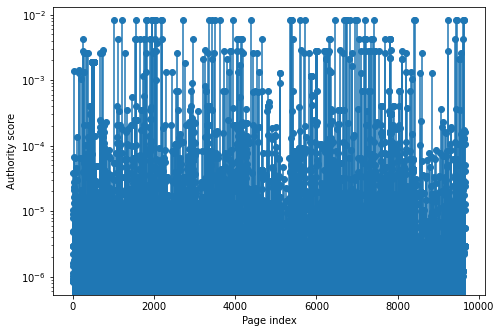

<Figure size 432x288 with 0 Axes>

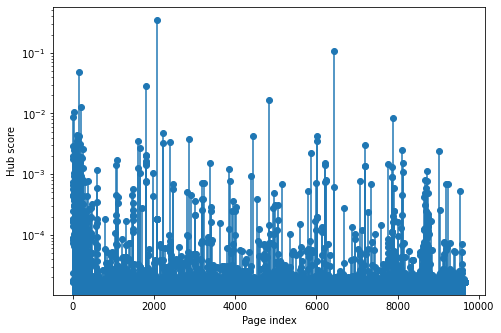

In [6]:
Au = A.transpose().dot(A) 
Hu = A.dot(A.transpose()) 
a=np.ones(A.shape[0])
h=np.ones(A.shape[0])
print(a,h)
for j in range(5):
    a = a.dot(Au)
    a = a/sum(a)
    h = h.dot(Hu)
    h = h/sum(h)

print(a,h)

import matplotlib.pyplot as plt

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel('Authority score')
ax.set_xlabel('Page index')
ax.set_yscale('log')
ax.stem(a)
plt.show()

plt.clf()
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.set_ylabel('Hub score')
ax2.set_xlabel('Page index')
ax2.set_yscale('log')
ax2.stem(h)
plt.show()